# Analysis of monthly return data

Description:


In [1]:
import feather
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

TODO:
data path
data loading/saving function

In [4]:
path = '../data/raw/monthly_returns.feather'
returns_a = feather.read_dataframe(path)

In [5]:
path = '../data/raw/total_summary.feather'
summary = feather.read_dataframe(path)

In [6]:
returns = returns_a.iloc[:,:]
returns.shape

(7273320, 3)

Drop duplicates

In [7]:
summary = summary.loc[:,('crsp_fundno','crsp_obj_cd')].drop_duplicates('crsp_fundno')

## Distribution by date

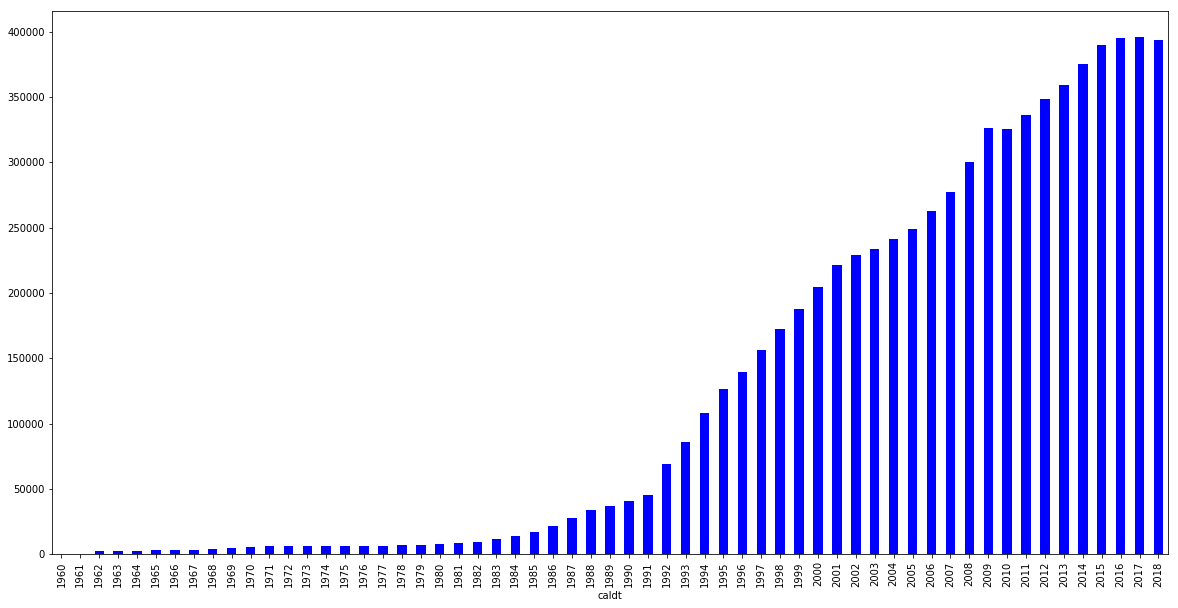

In [8]:
# Analysis of selected funds

## Distribution by date(returns['report_dt']
(returns['crsp_fundno']
    .groupby([
         returns['caldt'].dt.year,
#         returns['caldt'].dt.month
     ])
     .count()
     .plot(kind='bar',
           color = 'b',
          figsize=(20,10)))

## Observations per Fund

In [9]:
# Analysis of selected funds

## Distribution by date(returns['report_dt']
a = (returns['crsp_fundno']
    .groupby([
         returns['crsp_fundno']
     ])
    .count()
)
a = a.groupby(a).count().cumsum().T

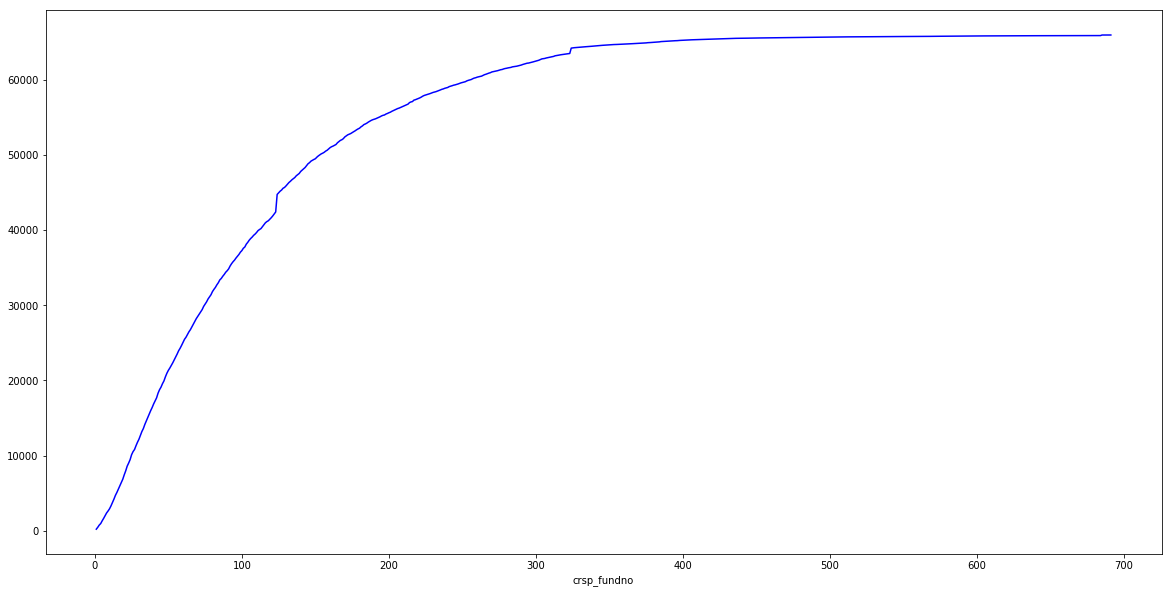

In [10]:
a.plot(kind='line',
       color = 'b',
       figsize=(20,10))

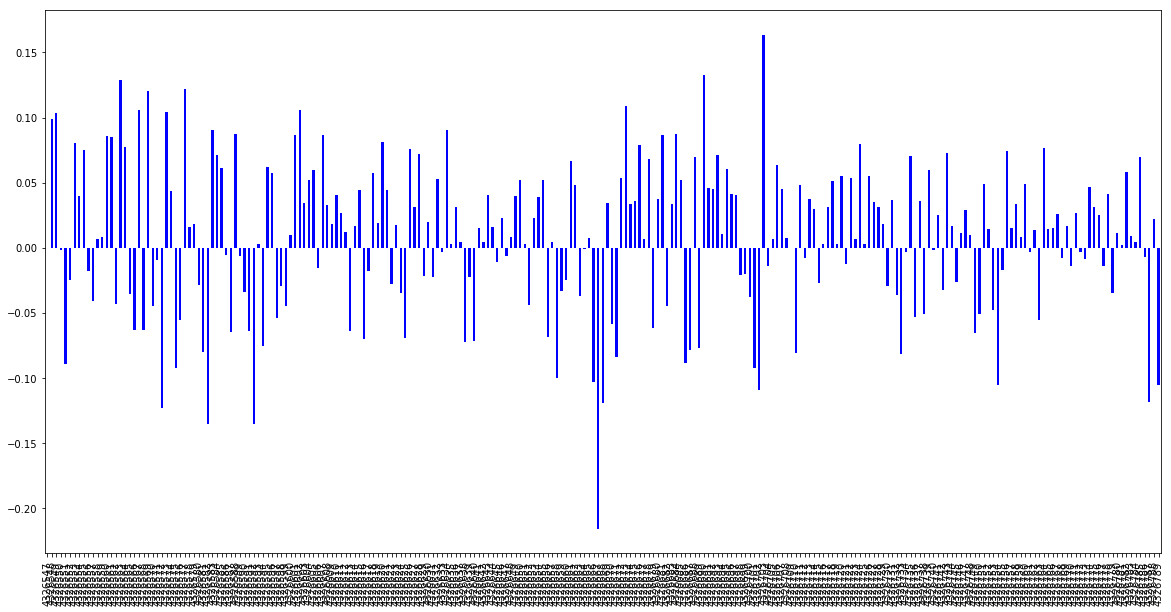

In [11]:
(returns.loc[returns['crsp_fundno'] == 27650,'mret']
    .plot(kind='bar',
          color = 'b',
          figsize=(20,10)))

## Map Obj codes to returns

In [12]:
summary.head().dtypes

crsp_fundno    float64
crsp_obj_cd     object
dtype: object

In [13]:
returns.head().dtypes

crsp_fundno           float64
caldt          datetime64[ns]
mret                  float64
dtype: object

In [14]:
returns_merged = returns.merge(summary, how='left', on=['crsp_fundno'])
returns_merged = returns_merged.dropna(axis = 0, how = 'any')

In [15]:
returns_merged.sample(10)

,crsp_fundno,caldt,mret,crsp_obj_cd
6766799,57286.0,2014-10-31,0.008212,EDYH
147917,2128.0,1987-06-30,0.045616,EDYG
6906449,59739.0,2016-01-29,-0.066282,EDSR
3861699,24956.0,2016-10-31,-0.045113,EDCS
6605066,54459.0,2014-12-31,0.005006,IF
2705764,17577.0,1994-07-29,0.030234,EDYI
2868925,18506.0,2003-11-28,0.007876,IUI
6225374,48894.0,2015-06-30,-0.035312,EF
614049,5402.0,1996-09-30,0.018313,M
6057757,46463.0,2002-12-31,0.018105,I


## Aggregate return

In [16]:
returns_merged.sample(5)

,crsp_fundno,caldt,mret,crsp_obj_cd
5055644,32257.0,2011-10-31,0.130501,EDYG
2665171,17341.0,2002-03-28,0.048729,EFRE
1054995,7912.0,1999-06-30,0.077663,EDYG
604752,5298.0,2017-11-30,0.017155,M
3653888,23506.0,2007-03-30,0.004230,ICDS


In [17]:
# Analysis of selected funds
return_class = returns_merged[returns_merged['crsp_obj_cd'] == 'EFSH']

In [18]:
return_class = (return_class['mret']
    .groupby([
        return_class['crsp_obj_cd'],
        return_class['caldt']
     ])
    .agg(['mean','count']))

In [19]:
return_class.loc[:,'cumulative'] = (return_class.loc[:,'mean'].fillna(0)+1).cumprod()

Cum return over time

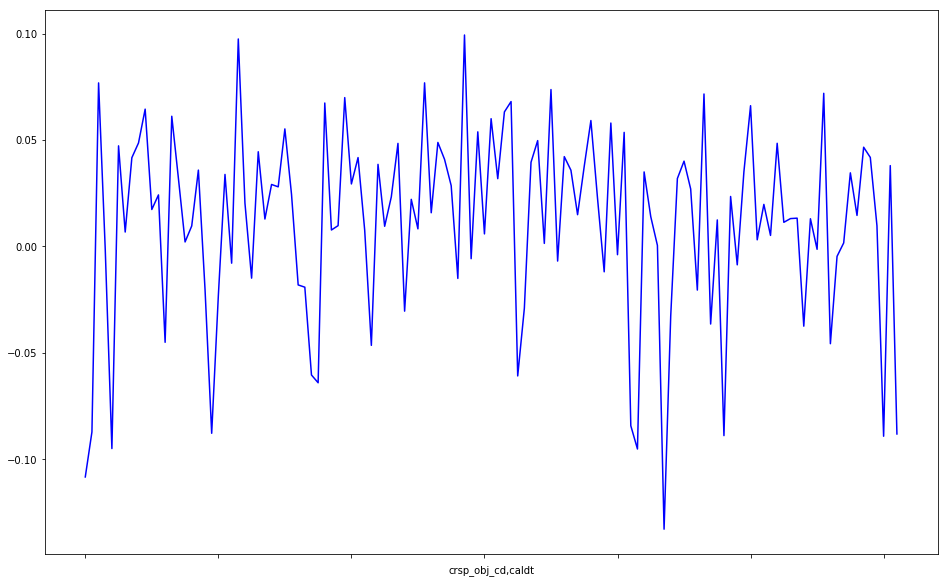

In [20]:
return_class['mean'].plot(kind='line',
           color = 'b',
          figsize=(16,10))

Different from zero?

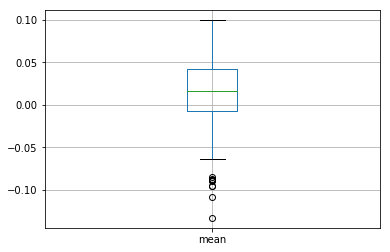

In [21]:
return_class.loc[:,['mean']].boxplot()

## Objective codes

In [22]:
returns_grouped = (returns_merged['cum']
    .groupby([
        returns_merged['crsp_obj_cd'],
#        returns_merged['caldt']
     ]))

KeyError: 'cum'

In [ ]:
returns_grouped = returns_grouped.describe()

In [ ]:
returns_grouped['mean'].sort_values().plot(
            kind='bar',
            color = 'b',
            figsize=(16,10))